In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv ('Hight-weight data.csv')

In [78]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [79]:
df.shape

(3501, 2)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [81]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


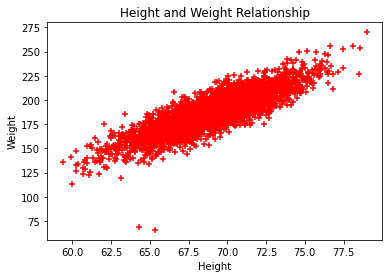

In [82]:
plt.scatter(df['Height'], df['Weight'], color='red', marker='+')
plt.xlabel ('Height')
plt.ylabel ('Weight')
plt.title ('Height and Weight Relationship')
plt.show()

In [83]:
df.Height.mean()

69.02441087268797

In [84]:
df.Weight.mean()

186.89125797946284

In [85]:
len(df.Height)

3501

In [86]:
df.shape

(3501, 2)

In [87]:
x = df[['Height']] #Dep Var
y = df['Weight'] #Indep Var

# Split the Dataset

In [88]:
from sklearn.model_selection import train_test_split as tts

In [89]:
xtrain, xtest, ytrain, ytest = tts (x, y, train_size = 0.70, random_state=1)

In [90]:
xtrain.shape

(2450, 1)

In [91]:
xtrain.head()

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [92]:
ytrain.head()

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
Name: Weight, dtype: float64

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lr = LinearRegression() #Creating object

In [95]:
lr.fit (xtrain, ytrain) #Train the ML model

LinearRegression()

In [96]:
lr.coef_

array([5.97744946])

In [97]:
lr.intercept_

-225.8260300075584

In [98]:
m=lr.coef_
c=lr.intercept_

In [99]:
x=66.786927
y = (m * x) + c
y

array([173.38945084])

In [100]:
lr.predict([[66.786927]])

array([173.38945084])

In [101]:
lr.predict(df[['Height']])

array([215.59078213, 185.31432533, 217.16337956, ..., 215.98249712,
       177.03027812, 208.96748706])

In [102]:
df['Predicted Weight'] = lr.predict(df[['Height']])

In [103]:
df

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
...,...,...,...
3496,69.296830,185.649086,188.392269
3497,70.542201,210.198845,195.836414
3498,73.912549,202.429960,215.982497
3499,67.396021,144.277671,177.030278


In [105]:
testing = lr.predict(xtest)
testing

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [106]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
236     185.716910
1125    187.258692
1008    212.204040
2169    193.586535
270     200.202828
Name: Weight, Length: 1051, dtype: float64

In [107]:
xtest['pred']=lr.predict(xtest)

In [108]:
xtest

,Height,pred
719,67.402821,177.070927
2296,69.560033,189.965551
3083,65.809912,167.549393
1296,67.687531,178.772764
2234,65.077902,163.173840
...,...,...
236,69.867101,191.801037
1125,70.280692,194.273256
1008,72.837685,209.557550
2169,67.675148,178.698746


In [110]:
xtest=xtest[['Height']]

In [111]:
from sklearn.metrics import mean_squared_error
pred = lr.predict (xtest)
mse = mean_squared_error (ytest,pred)

In [112]:
mse

110.89221516932379

In [113]:
from sklearn.metrics import mean_absolute_error

In [115]:
mae = mean_absolute_error(ytest, pred)
mae

8.279688660993672

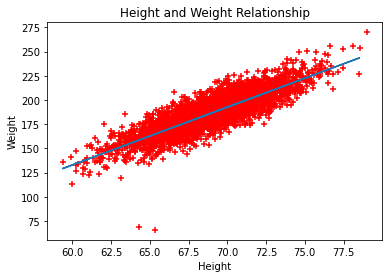

In [118]:
plt.scatter(df['Height'], df['Weight'], color='red', marker='+')
plt.plot(xtest, lr.predict(xtest))
plt.xlabel ('Height')
plt.ylabel ('Weight')
plt.title ('Height and Weight Relationship')
plt.show()

In [119]:
lr.score(xtest, ytest) #Squared value

0.7313258168853622

In [121]:
lr.score (df[['Height']], df.Weight)

0.7323100609319788

In [122]:
lr.score (xtrain, ytrain)

0.7327243206606743